# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

Our task is to perform Machine Learning regression on noisy data with a Neural Network (NN), with the Supervised Learning method. We want to explore how the NNs' ability to fit depends upon their structure.

**Neural Networks**

The method consists in learning from "labeled" data in order to approximate the mapping function between input ad output data to be able to predict, given input data, the output variables (the "labels") for that data.

The Neural Network is given as input a dataset $\{x_i\}$, which it combines as follows:

$$y=\sum_i w_i x_i + b$$

where $w_i$ are the weights and $b$ is called the *bias*; this result $y$ is filtered with an *activation function* $f(y)$, that returns the effective output. 

As the NN is composed of so called *neurons*, these steps are performed by each of them. The *neurons* are grouped in layers: the input and the output ones and a certain number of *hidden layers* between them. This stucture of *neurons* and *hidden layers* is not fixed and it is important to calibrate it in order to maximize the quality of results while containing the model complexity.

To make prediction, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the model class that we are using to try to model the data and make predictions.


**The Prediction Problem**

As we want to use a NN to solve regression problems, we consider a dataset generated by drawing samples from the equation

$$y_i= f(x_i) + \eta_i,$$

where $\eta_i$ is a Gaussian, uncorrelate noise variable such that $\langle \eta_i \rangle=0$ and $\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma$.

This represents the *dataset* for the NN *training*, that is repeated repeated more times, called *epochs*, to allow the NN to optimize the weights. The objective of the training is to find the parameters that describe those training points in order to apply them to new input data. We thus test the effectiveness of the NN on a different dataset, the *validation data set*.


For measuring the predictive performance of our algorithm we compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$, with the sum of the Mean Square Error (MSE) on the test set, that is then the loss function that we want to minimize:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

### Exercise 11.1 - linear fit
    
We want to first fit a linear function:
$$
f(x)=2x+1
$$

using the given code. We also want to evaluate its performaces while varying the following parameters:
- the number of epochs $N_{\mathrm{epochs}}$
- the number of data points $N_{\mathrm{train}}$
- the noise $\sigma$


We set $\sigma=0.4$ to deviate the set of input data from the ideal linear function behaviour. This is a good choice for the noise, as, after some runs with different set of parameters, we find that it has little influence on the performance of the model.

After some runs of the code, we find that increasing the number of data points to $N_{\mathrm{train}}=1000$ and $N_{\mathrm{test}}=100$ we obtain better results.

Note: usually having the dataset divided in $90\%$ of training data points and $10 \%$ of validation points is a good choice.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)

n_valid = 100
n_train = n_valid*10
sigma = 0.4 # noise standard deviation
n_epochs = 30

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

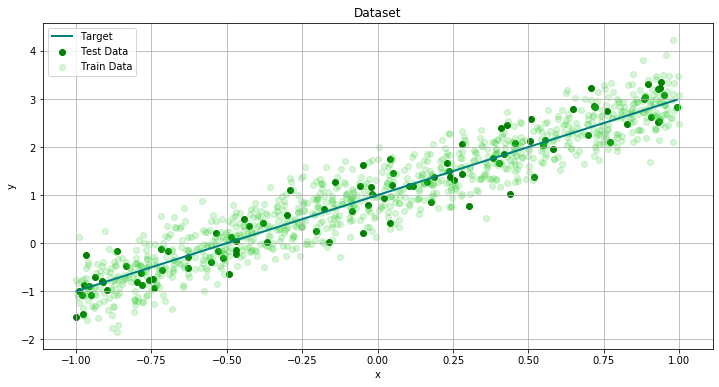

In [4]:
# plot training and target dataset
plt.figure(figsize=(12, 6))
plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='green', label='Test Data')
plt.scatter(x_train, y_train, color='limegreen', alpha=0.2, label='Train Data')
plt.title("Dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Our Neural Network structure is kept simple: just a single neuron in a single hidden layer. In fact, this is sufficient to optimize the two parameters of the linear function, the slope $m$ and the intersect $b$.

In [5]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We now train our model: we feed the neuron with the training dataset from which the optimizer will find the best weights ($m$ and $b$) to minimize the Mean Square Error loss function.

The training must be repeated $N_{\mathrm{epochs}}$ times to allow the NN to optimize the weights. A single epoch would underfit the function, while a number of epochs too large would lead to an overfitting. Note that every epoch corresponds to using all training data divided in mini-batches, here set to size $32$ (to avoid overfitting and to reach more efficiency).

Running the code a few times, we find that leaving $N_{\mathrm{epochs}}=30$ is a good choice, as if encreased it does not lead to better results.

We also note that if $N_{train}$ is left to its initial value $100$, $N_{epochs}$ has to be increased to $100$ to get good results.

In [6]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

In [11]:
# return weights
obt_m, obt_b = model.get_weights()

print('Optimized parameters:','\nm =', obt_m[0][0],'\nb =', obt_b[0])

Optimized parameters: 
m = 1.9944656 
b = 1.0037427


In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print('\n',' Test loss:', score[0])
print('  Test accuracy:', score[1], '\n')

# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print('\n','With the exact curve:')
print('  Test loss:', score2[0])
print('  Test accuracy:', score2[1])

4/4 [==============================] - 0s 836us/step - loss: 0.1320 - mse: 0.1320

  Test loss: 0.13196061551570892
  Test accuracy: 0.13196061551570892 

4/4 [==============================] - 0s 998us/step - loss: 2.7507e-05 - mse: 2.7507e-05

 With the exact curve:
  Test loss: 2.7507267077453434e-05
  Test accuracy: 2.7507267077453434e-05


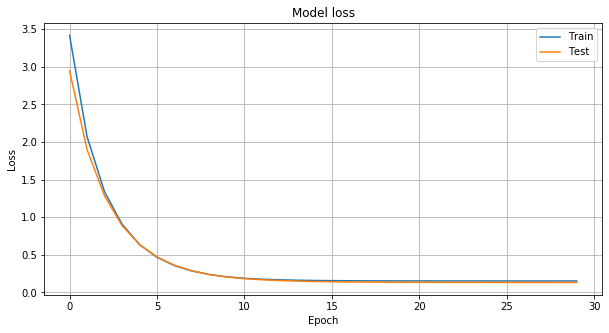

In [9]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

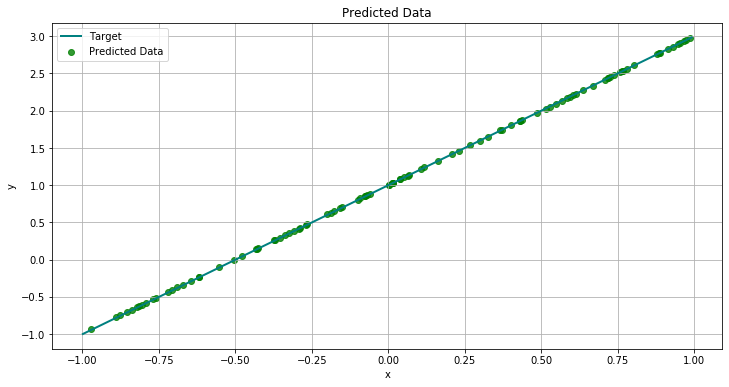

In [10]:
x_predicted = np.random.uniform(-1, 1, n_valid)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(12, 6))
plt.scatter(x_predicted, y_predicted, color='green', alpha=0.8, label="Predicted Data")
plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In conclusion, we can observe that increasing the number of training points we obtain better results rather than increasing the number of epochs.